In [13]:
import korean
import IPython
import librosa
import matplotlib.pyplot as plt

def koreanCleaner(text):
    return "".join(korean.tokenize(text))

def displayWaveImage(path):
    x, sr = librosa.load(path)
    plt.figure(figsize=(14, 5))
    librosa.display.waveplot(x, sr=sr)

 > Using model: glow_tts
 > Text: 신은 우리의 수학 문제에는 관심이 없다. 신은 다만 경험적으로 통합할 뿐이다.
 > Text splitted to sentences.
['신은 우리의 수학 문제에는 관심이 없다.', '신은 다만 경험적으로 통합할 뿐이다.']
 > Processing time: 1.87062406539917
 > Real-time factor: 0.2836032772418296
 > Saving output to output.wav


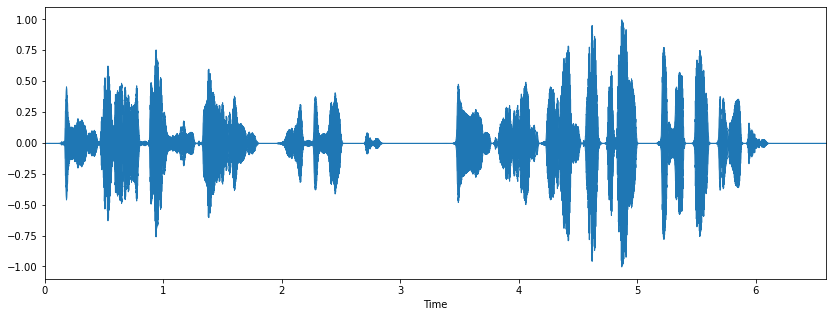

In [38]:
#inference Using Griffin-Lim Vocoder 
input_text = "신은 우리의 수학 문제에는 관심이 없다. 신은 다만 경험적으로 통합할 뿐이다."
inputText=koreanCleaner(input_text)

!tts \
    --text "$inputText" \
    --model_path model/tts/glowtts/coqui_tts-December-08-2021_08+50AM-0000000/checkpoint_20000.pth.tar \
    --config_path model/tts/glowtts/coqui_tts-December-08-2021_08+50AM-0000000/config.json \
    --out_path output.wav

displayWaveImage("output.wav")
IPython.display.Audio("output.wav")

 > Using model: glow_tts
 > Vocoder Model: multiband_melgan
 > Generator Model: multiband_melgan_generator
 > Discriminator Model: melgan_multiscale_discriminator
 > Text: 신은 우리의 수학 문제에는 관심이 없다. 신은 다만 경험적으로 통합할 뿐이다.
 > Text splitted to sentences.
['신은 우리의 수학 문제에는 관심이 없다.', '신은 다만 경험적으로 통합할 뿐이다.']
 > Processing time: 0.47052645683288574
 > Real-time factor: 0.0701020836024671
 > Saving output to output.wav


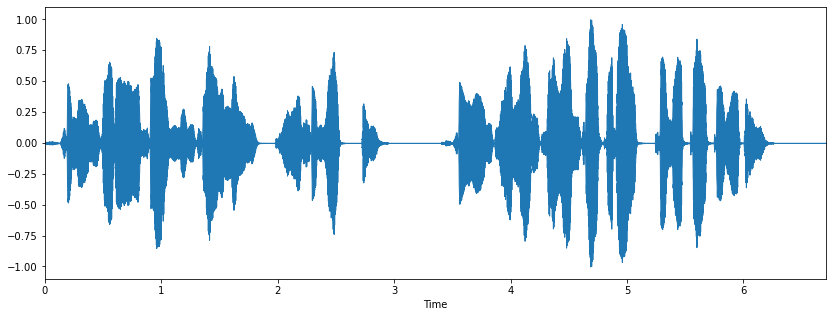

In [40]:
##inference Using trained Vocoder 
input_text = "신은 우리의 수학 문제에는 관심이 없다. 신은 다만 경험적으로 통합할 뿐이다."
inputText=koreanCleaner(input_text)

!tts \
    --text "$inputText" \
    --model_path model/tts/glowtts/coqui_tts-December-08-2021_08+50AM-0000000/checkpoint_20000.pth.tar \
    --config_path model/tts/glowtts/coqui_tts-December-08-2021_08+50AM-0000000/config.json \
    --out_path output.wav \
    --vocoder_path model/vocoder/mbmelgan/coqui_tts-December-03-2021_04+00PM-0000000/best_model_180000.pth.tar \
    --vocoder_config_path model/vocoder/mbmelgan/coqui_tts-December-03-2021_04+00PM-0000000/config.json

displayWaveImage("output.wav")
IPython.display.Audio("output.wav")

In [23]:
#tensorboard
!tensorboard --bind_all --logdir ./model/tts/glowtts/coqui_tts-December-08-2021_08+50AM-0000000


TensorFlow installation not found - running with reduced feature set.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

TensorBoard 2.7.0 at http://user-System-Product-Name:6006/ (Press CTRL+C to quit)
^C
